To begin source detection, we need first simulate the source. Let us assume uniform background and single point source sampled from multivarivative gaussian. We then need to concatenate all events to single list for analysis/plotting.

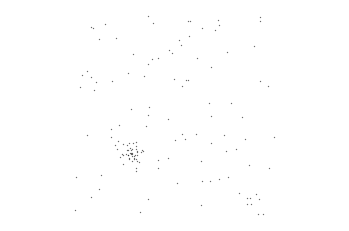

In [9]:
import scipy.stats
from numpy import *
import pylab as pl
from poisson_etest import poisson_etest

N_src = 40
N_bkg = 100
psf_size = 0.1
source_x,source_y = 3,3

def sim_source(x0,y0,psf_size=psf_size,N_src=N_src,N_bkg=N_bkg):
    bkg_x = scipy.stats.uniform(0,10).rvs(N_bkg)
    bkg_y = scipy.stats.uniform(0,10).rvs(N_bkg)
    src_x, src_y = transpose(scipy.stats.multivariate_normal(mean=(x0,y0),cov=psf_size).rvs(N_src))
    x,y = concatenate((bkg_x,src_x)),concatenate((bkg_y,src_y))
    return x,y
x,y = sim_source(source_x,source_y)
pl.plot(x,y,'k.',ms=0.5)
trash = pl.axis('equal')
trash = pl.axis('off')


Now we can start the analysis. To do that, we need to be able to define source/background windows, and get number of source and background counts and area of the windows. Here we use two nested circular regions. It is assumed that photons coordinates are global variables x,y here

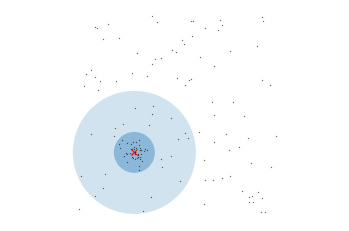

In [10]:
def get_counts(x0,y0,x,y,r_src=1.0,r_bkg=2.0):
    src_area=pi*r_src**2
    bkg_area=pi*r_bkg**2-src_area
    d = sqrt((x-x0)**2+(y-y0)**2) #distance to all photons (to avoid recalculations)
    n_src = sum(d<=r_src)
    n_bkg = sum((d<=r_bkg)*(d>r_src))
    return n_src, n_bkg, src_area, bkg_area

def get_prob(x0,y0,x,y,r_src=1.0,r_bkg=3.0,plot=False,alternative='greater'):
    if plot:
        pl.plot(x,y,'k.',ms=0.5)
        pl.gca().add_patch(pl.matplotlib.patches.Circle((x0,y0),r_src,alpha=0.4))
        pl.gca().add_patch(pl.matplotlib.patches.Circle((x0,y0),r_bkg,alpha=0.2))
        pl.plot([x0],[y0],'rx')
        trash = pl.axis('equal')
    return poisson_etest(*get_counts(x0,y0,x,y),alternative=alternative)

get_prob(3,3,x,y,plot=True)
trash = pl.axis('equal')
trash = pl.axis('off')



Now we are ready to search for our sources, i.e. make the significance map. To do that, we need to define a grid of x,y values where we center our trial circle, and calculate log probability for each of those. Note that this is strictly speaking is not required by experiment, but still is fun to do as that's the main purpose of source detection!

In [11]:
X,Y = meshgrid(arange(0,10,0.1),arange(0,10,0.1))
prob_vec = vectorize(lambda xx,yy: get_prob(xx,yy,x,y)) # vectorize function to avoid loops
prob = prob_vec(X,Y) # this will take a while to complete

<ipython-input-12-f547482851ca>:1: RuntimeWarning: divide by zero encountered in log10
  pl.pcolor(X,Y,log10(prob))
<ipython-input-12-f547482851ca>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolor(X,Y,log10(prob))


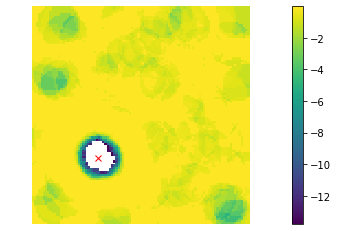

In [12]:
pl.pcolor(X,Y,log10(prob))
pl.plot([source_x],[source_y],'rx')
pl.colorbar()
trash = pl.axis('equal')
trash = pl.axis('off')



Now, let's do what is requiested, i.e. study significance of the detection as function of source/background counts in simulation (fixed position). Let's define function which will do it all taking N_src, N_bkg as arguments:

<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
<ipython-input-29-585b610bdc2a>:6: RuntimeWarning: divide by zero encountered in

Text(0, 0.5, 'Log P')

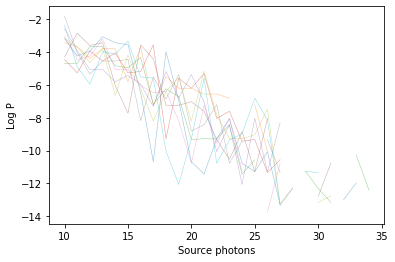

In [29]:
def get_signif(s,b,**kwargs):
    x,y = sim_source(5,5,N_src=s,N_bkg=b,**kwargs)
    return get_prob(5,5,x,y,plot=False)

for i in range(10):
    pl.plot(arange(10,50,1),log10([get_signif(x,100,) for x in arange(10,50,1)]),lw=0.5,alpha=0.5)
pl.xlabel('Source photons')
pl.ylabel('Log P')

In a same way you can study also dependence on other parameters, but I skip this in the solution